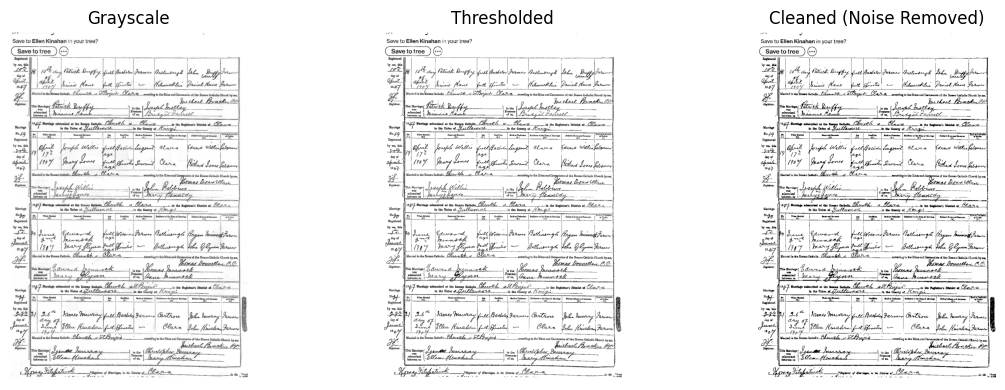

Preprocessing complete!
Images saved in: /Users/aaronbaggot/Desktop/Script2Text/output


In [2]:

# Script2Text - Step 1: Preprocessing

# This script reads a handwritten note image, converts it to grayscale,
# applies thresholding, removes noise, and saves each step.


import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# 1. Define the path to the image

# This will work for your Script2Text folder structure
ROOT = Path.cwd().parents[0]  
img_path = ROOT / "data" / "samples" / "Handwritten_note.png"


# 2. Load the image using OpenCV

I = cv2.imread(str(img_path))
if I is None:
    raise Exception(f"Image not found: {img_path}")


# 3. Convert the image to grayscale

gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)


# 4. Apply Otsu’s thresholding to binarize the image

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# 5. Use morphological opening to clean small noise

kernel = np.ones((2, 2), np.uint8)
clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)


# 6. Display results using Matplotlib

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Grayscale")
plt.imshow(gray, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Thresholded")
plt.imshow(thresh, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Cleaned (Noise Removed)")
plt.imshow(clean, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


# 7. Save the outputs to the output folder

output_dir = ROOT / "output"
output_dir.mkdir(parents=True, exist_ok=True)

cv2.imwrite(str(output_dir / "step1_gray.jpg"), gray)
cv2.imwrite(str(output_dir / "step2_thresh.jpg"), thresh)
cv2.imwrite(str(output_dir / "step3_clean.jpg"), clean)

print("Preprocessing complete!")
print("Images saved in:", output_dir)
